In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_77212/42624459.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# 파일 불러오기
with open('../../data/df.pkl', 'rb') as f:
    df = pickle.load(f)


In [5]:
# 파일 불러오기
with open('../../data/df_qna.pkl', 'rb') as f:
    df_qna = pickle.load(f)

In [6]:
# 파일 불러오기
with open('../../data/node.pkl', 'rb') as f:
    node = pickle.load(f)

In [7]:
# 파일 불러오기
with open('../../data/edgelist.pkl', 'rb') as f:
    edgelist = pickle.load(f)

In [8]:
# 파일 불러오기
centernode = pd.read_csv('../../data/centernode_gephi.csv')

In [9]:
print(df['q_owneruserid'].min())
print(df['q_owneruserid'].max())

214
23031022


In [10]:
centernode

,Source,Target,Type,Id,Label,Weight
0,22801094,1180351,Directed,12212,NaN,1
1,11143113,1180351,Directed,12040,NaN,1
2,20677096,1180351,Directed,12009,NaN,1
3,2449161,1180351,Directed,11354,NaN,1
4,14701970,1180351,Directed,11222,NaN,1
...,...,...,...,...,...,...
8587,1705983,1585136,Directed,3008,NaN,1
8588,8002175,8002175,Directed,4810,NaN,1
8589,1045142,2083900,Directed,3977,NaN,1
8590,8002175,1045142,Directed,9755,NaN,1


Data wrangling

In [11]:
print("전체 edge 개수 : ", df.shape[0])
print("중심부 edge 개수 : ", centernode.shape[0])

전체 edge 개수 :  12428
중심부 edge 개수 :  8592


In [12]:
print("전체 node 개수 : ", len(df_qna['user_id'].unique()))
print("중심부 node 개수 : ", len(np.union1d(centernode['Source'].values, centernode['Target'].values)))

전체 node 개수 :  11392
중심부 node 개수 :  6681


In [ ]:
print("본인 질문에 직접 답변한 경우 : ", len(df[(df['q_owneruserid'] == df['a_owneruserid'])]))
print("(중심부)본인 질문에 직접 답변한 경우 : ", len(centernode[(centernode['Source'] == centernode['Target'])]))

In [13]:
print("데이터 셋 내 최초 질문 일시 : ", df['q_creationdate'].min())
print("데이터 셋 내 최종 질문 일시 : ", df['q_creationdate'].max())

데이터 셋 내 최초 질문 일시 :  2023-08-03 01:04:49.693000
데이터 셋 내 최종 질문 일시 :  2023-12-03 08:29:11.803000


In [14]:
print("데이터 셋 내 최초 답변 일시 : ", df['a_creationdate'].min())
print("데이터 셋 내 최종 답변 일시 : ", df['a_creationdate'].max())

데이터 셋 내 최초 답변 일시 :  2023-08-03 01:23:36.673000
데이터 셋 내 최종 답변 일시 :  2023-12-03 10:02:09.807000


In [22]:
q_df = df[['q_id', 'q_creationdate']].copy()
q_df.drop_duplicates(inplace=True)

a_df = df[['a_id', 'a_creationdate']].copy()
a_df.drop_duplicates(inplace=True)

In [23]:
q_df['create_month'] = pd.to_datetime(q_df['q_creationdate']).dt.month
a_df['create_month'] = pd.to_datetime(a_df['a_creationdate']).dt.month

In [24]:
q_df = q_df.groupby(['create_month']).count()['q_id'].reset_index()
a_df = a_df.groupby(['create_month']).count()['a_id'].reset_index()

In [25]:
qna_month = pd.merge(q_df,a_df, on  = 'create_month')

In [26]:
qna_month

,create_month,q_id,a_id
0,8,2471,2891
1,9,2427,3111
2,10,2427,3123
3,11,2202,3096
4,12,128,207


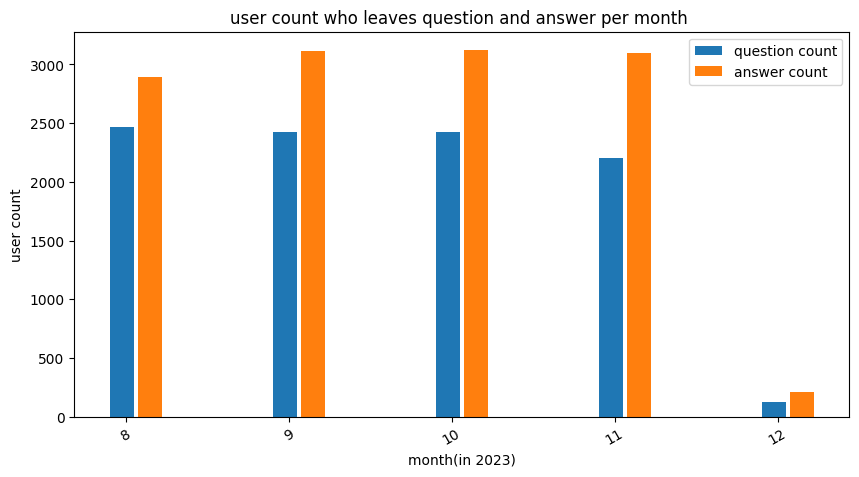

In [27]:
idx = np.arange(qna_month.shape[0])
w = 0.15

plt.figure(figsize = (10, 5))
plt.title('user count who leaves question and answer per month ')
plt.xlabel('month(in 2023)')
plt.ylabel('user count')
plt.bar(idx - w * w, qna_month['q_id'], width = w, label = 'question count')
plt.bar(idx + w, qna_month['a_id'], width = w, label = 'answer count')
plt.xticks(idx, qna_month['create_month'], rotation = 30)
plt.legend(ncol = 1)
plt.show()

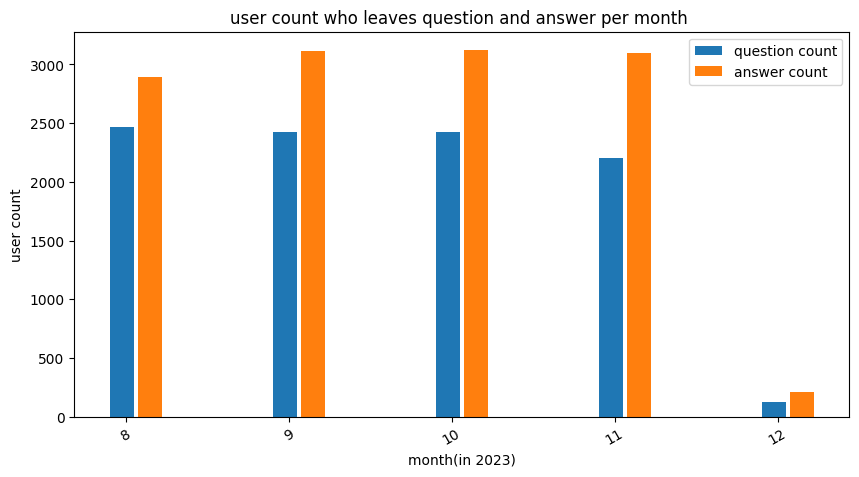

In [28]:
idx = np.arange(qna_month.shape[0])
w = 0.15

plt.figure(figsize = (10, 5))
plt.title('user count who leaves question and answer per month ')
plt.xlabel('month(in 2023)')
plt.ylabel('user count')
plt.bar(idx - w * w, qna_month['q_id'], width = w, label = 'question count')
plt.bar(idx + w, qna_month['a_id'], width = w, label = 'answer count')
plt.xticks(idx, qna_month['create_month'], rotation = 30)
plt.legend(ncol = 1)
plt.show()

## 유저 별 질문/답변 횟수를 히스토그램으로 출력 
* 대부분의 유저들이 질문과 답변을 안한다는 것을 알 수 있음 

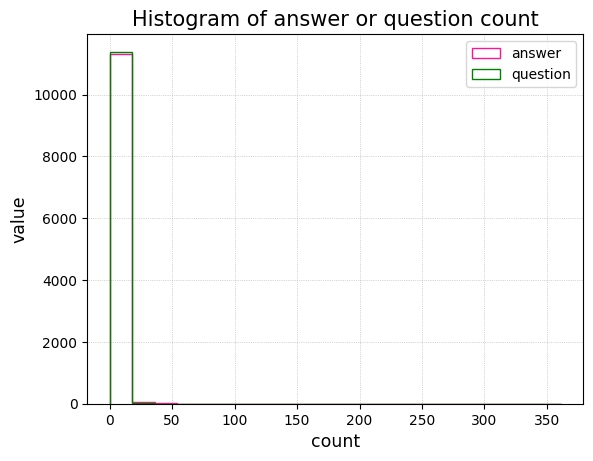

In [29]:
fig, ax = plt.subplots()

ax.hist([df_qna['question_cnt'], df_qna['answer_cnt']], # specify data
        bins = 20, # number of bins
        color = ['green', 'deeppink'], # bar color
        histtype = 'step', # type of histogram
        label = ['question', 'answer']) # create legened labels

ax.set_title('Histogram of answer or question count', fontsize = 15) # title
ax.set_xlabel('count', fontsize = 12.5) # x-axis label
ax.set_ylabel('value', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

## 같은 데이터를 활용하여 누적분포 함수 시각화
* 질문횟수와 답변횟수가 비슷한 기울기를 보이다가, 질문횟수가 답변횟수보다 먼저 1로 수렴 
* 답변횟수보다 질문횟수가 0에 더 가깝다는것을 알 수 있음

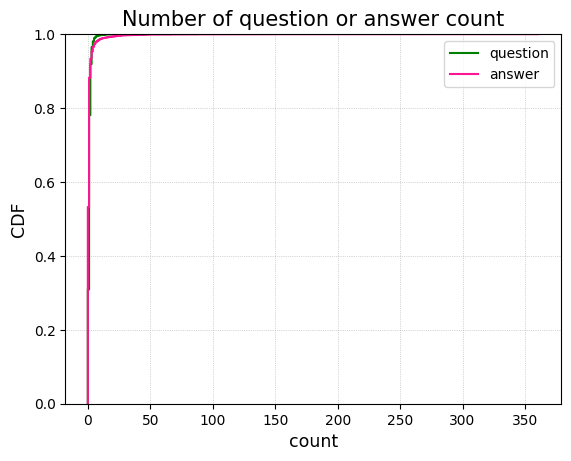

In [30]:
### cdf plot for multiple groups

fig, ax = plt.subplots()

sns.ecdfplot(x = df_qna['question_cnt'],
             color = 'green',
             label = 'question',
             ax = ax)
sns.ecdfplot(x = df_qna['answer_cnt'],
             color = 'deeppink',
             label = 'answer',
             ax = ax)

ax.set_title('Number of question or answer count', fontsize=15)
ax.set_xlabel('count', fontsize = 12.5)
ax.set_ylabel('CDF', fontsize = 12.5)

ax.legend(loc = 'upper right', fontsize = 10)

ax.grid(True, linestyle=':', linewidth = 0.5)

plt.show();

## 유저 별 답변비율 시각화
* 위의 그래프를 보면 대부분의 유저들이 질문도 답볃도 하지 않는 상황
* 그럼 유저별로 질문 답변 횟수 사이에 차이가 존재하는지 비율로 확인 
* (유저별 질문횟수)/(유저별 질문횟수+유저별 답변횟수)
* 대부분의 유저들이 거의 답변을 하지 않고, 몇몇의 유저들이 답변만 하는 것을 알 수 있음

In [31]:
df_qna['question_rate'] = np.round(df_qna['question_cnt']/(df_qna['question_cnt']+df_qna['answer_cnt'])*100, 2)

In [32]:
df_qna['answer_rate'] = 100-df_qna['question_rate'] 

Text(0, 0.5, 'Number of Users')

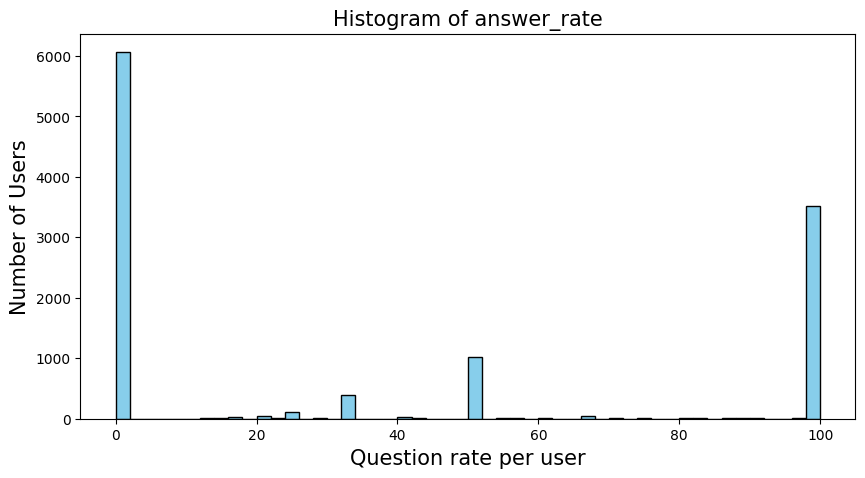

In [33]:
fig, axs = plt.subplots(1, 1, figsize = (10, 5))

axs.hist(df_qna['answer_rate'] , # plot the original histogram
         bins = 50,
         color = 'skyblue',
         edgecolor = 'black')
axs.set_title('Histogram of answer_rate', fontsize = 15)
axs.set_xlabel('Question rate per user', fontsize = 15)
axs.set_ylabel('Number of Users', fontsize = 15)



In [34]:
df_qna

,user_id,question_cnt,answer_cnt,question_rate,answer_rate
0,214,1.0,0.0,100.0,0.0
1,1238,1.0,0.0,100.0,0.0
2,1968,0.0,1.0,0.0,100.0
3,2648,4.0,1.0,80.0,20.0
4,2732,1.0,0.0,100.0,0.0
...,...,...,...,...,...
11387,23027979,1.0,0.0,100.0,0.0
11388,23028285,2.0,0.0,100.0,0.0
11389,23028978,1.0,0.0,100.0,0.0
11390,23029300,1.0,0.0,100.0,0.0


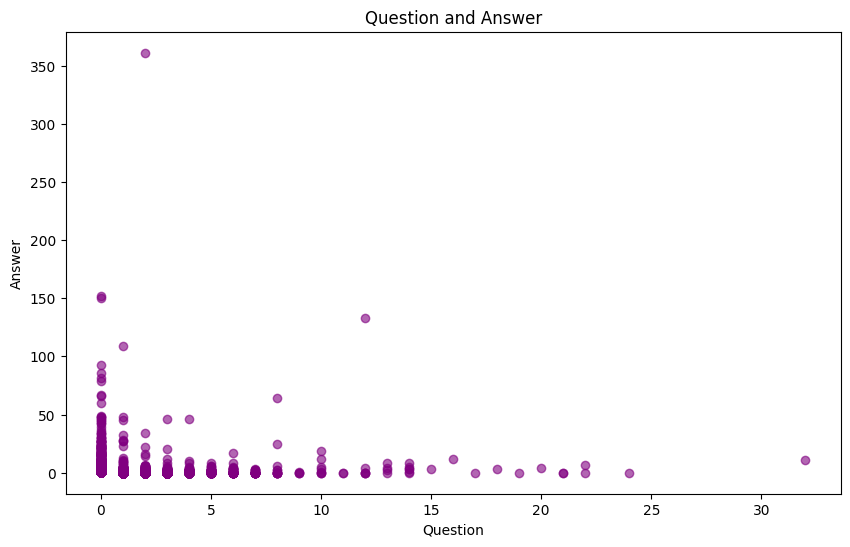

In [35]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))

ax.scatter(df_qna['question_cnt'], df_qna['answer_cnt'], color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

## 질문 혹은 답변 횟수가 0인 유저 별 비율 시각화
* 그래프를 보면 어떤 수치든 양극단의 비율이 높음(정규분포를 띄지 않음)
* 극단에 존재하는 유저(답변횟수가 0 이거나 질문 횟수가 0)들을 대상으로 시각화 진행
* 한번도 질문하지 않은 유저는 10706명, 한번도 답변하지 않은 유저는 23442명으로 답하지 않은 유저가 약 2.18 배 많음 
* 한번도 답변하지 않은 유저의 경우 모두 25회 미만으로 질문하였지만, 한번도 대답하지 않은 유저의 경우 분산이 크며 경우에 따라 200회 이상 답변한 유저도 존재 
* 답변하는 유저가 더 적은 수지만 훨씬 더 활발하게 활동한다는것을 알 수 있음 

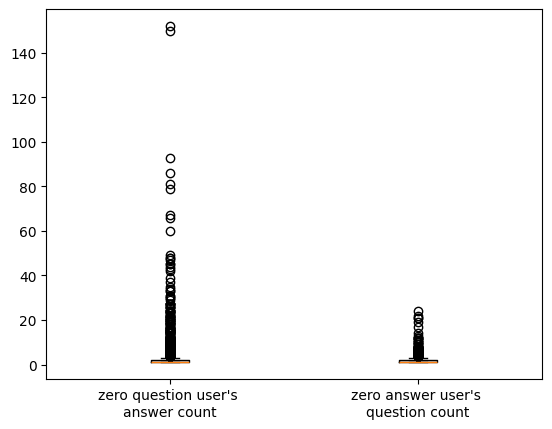

In [36]:
zero_q_cnt = df_qna.loc[df_qna['question_cnt']==0, 'answer_cnt']
zero_a_cnt = df_qna.loc[df_qna['answer_cnt']==0, 'question_cnt']

fig,ax = plt.subplots()
ax.boxplot([zero_q_cnt,zero_a_cnt])
# plt.title('Species_bill_length')
plt.xticks([1,2],['zero question user\'s \nanswer count', 'zero answer user\'s \nquestion count'])
plt.show();

In [37]:
print(len(zero_q_cnt))
print(len(zero_a_cnt))
print(len(zero_a_cnt)/len(zero_q_cnt))

3520
6064
1.7227272727272727


In [38]:
q_reputation = df[['q_owneruserid','q_reputation']].rename(columns = {'q_owneruserid':'user_id', 'q_reputation':'reputation'})
a_reputation = df[['a_owneruserid','a_reputation']].rename(columns = {'a_owneruserid':'user_id', 'a_reputation':'reputation'})

In [39]:
df_reputation = pd.concat([q_reputation, a_reputation], axis = 0).drop_duplicates()

In [40]:
df_qna = pd.merge(df_qna, df_reputation, on = 'user_id', how='left')

In [41]:
df_qna.isna().sum()

user_id          0
question_cnt     0
answer_cnt       0
question_rate    0
answer_rate      0
reputation       0
dtype: int64

In [42]:
df_qna.sort_values(by = ['question_cnt'], ascending=False)

,user_id,question_cnt,answer_cnt,question_rate,answer_rate,reputation
9186,22186847,32.0,11.0,74.42,25.58,321
326,352290,24.0,0.0,100.00,0.00,729
5609,11873562,22.0,7.0,75.86,24.14,162
2745,4450024,22.0,0.0,100.00,0.00,4101
6867,15435022,21.0,0.0,100.00,0.00,758
...,...,...,...,...,...,...
7995,19475185,0.0,1.0,0.00,100.00,10069
3307,5684257,0.0,1.0,0.00,100.00,27577
7997,19484558,0.0,3.0,0.00,100.00,29
3306,5682770,0.0,2.0,0.00,100.00,341


In [43]:
df_qna.sort_values(by = ['answer_rate'], ascending=False)

,user_id,question_cnt,answer_cnt,question_rate,answer_rate,reputation
3886,7116391,0.0,2.0,0.0,100.0,13
3442,5941322,0.0,1.0,0.0,100.0,45
3419,5889494,0.0,3.0,0.0,100.0,360
3421,5892518,0.0,1.0,0.0,100.0,836
6759,15094359,0.0,1.0,0.0,100.0,91
...,...,...,...,...,...,...
5555,11751666,1.0,0.0,100.0,0.0,51
5549,11740962,1.0,0.0,100.0,0.0,23
5548,11740548,2.0,0.0,100.0,0.0,159
5546,11738494,1.0,0.0,100.0,0.0,41


In [44]:
zero_q_rep = df_qna.loc[df_qna['question_cnt']==0, 'reputation']

In [45]:
zero_a_rep = df_qna.loc[df_qna['answer_cnt']==0, 'reputation']


## 질문 혹은 답변 횟수가 0인 유저 별 stackoverflow 평판(reputation) 시각화
* reputation이 높아질수록 유저의 수도 적어짐
* 답변하는 유저가 더 적은 수지만 커뮤니티에서 평판을 쌓아간다는 것을 알 수 있음 


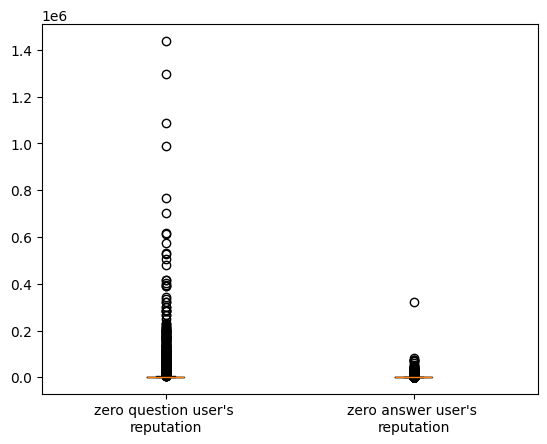

In [46]:
fig,ax = plt.subplots()
ax.boxplot([zero_q_rep,zero_a_rep])
# plt.title('Species_bill_length')
plt.xticks([1,2],['zero question user\'s \nreputation', 'zero answer user\'s \nreputation'])
plt.show();